|  [National Science Data Fabric](https://nationalsciencedatafabric.org/) | [WIRED Global Center](https://resilience.utah.edu/) | [NASA Open Climate Workbench (OCW)](https://esto.nasa.gov/forums/estf2024/estf24Abstracts/lee.html)  |
|:---:|:---:|:---:|
|![nsdf](NSDF-smaller.PNG) | ![NASA](NASA.png) | ![wired](wired-logo-small.png) |

### Controlling cache and reding different CMPI6 variables {.unnumbered}
created by [Valerio Pascucci](http://cedmav.org/) 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys

# # sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo")
import OpenVisus as ov
os.environ["VISUS_CACHE"]=os.environ.get("VISUS_CACHE","./visus_cache_can_be_erased")
print("VISUS_CACHE is ",os.environ["VISUS_CACHE"])

VISUS_CACHE is  ./visus_cache_can_be_erased


# More complex examples

600 1440


0it [00:00, ?it/s]

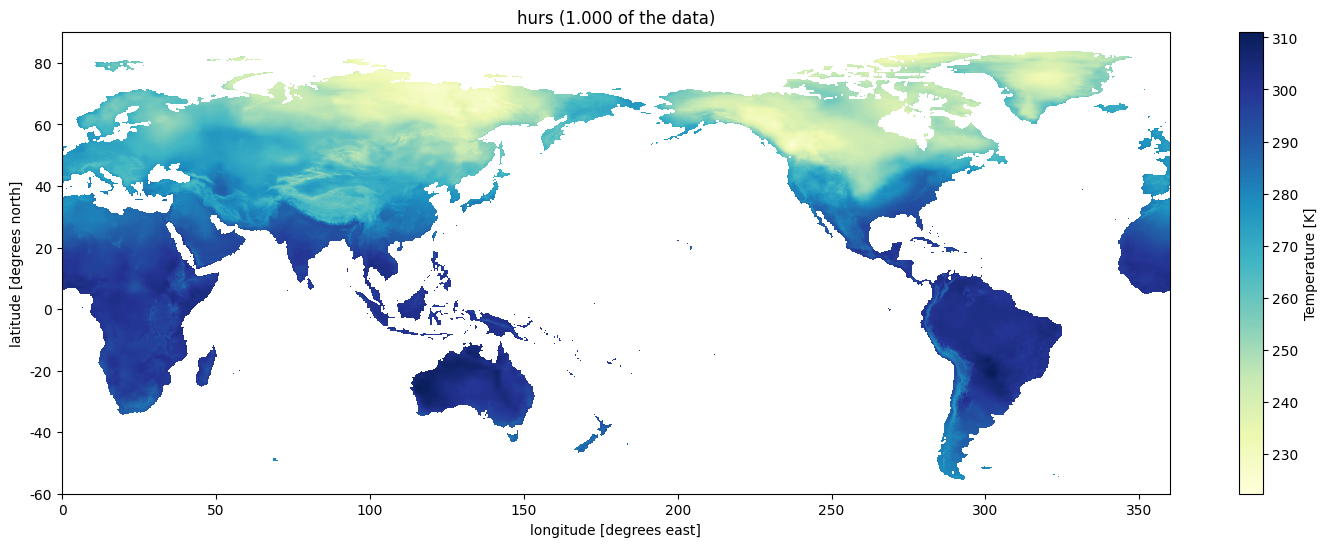

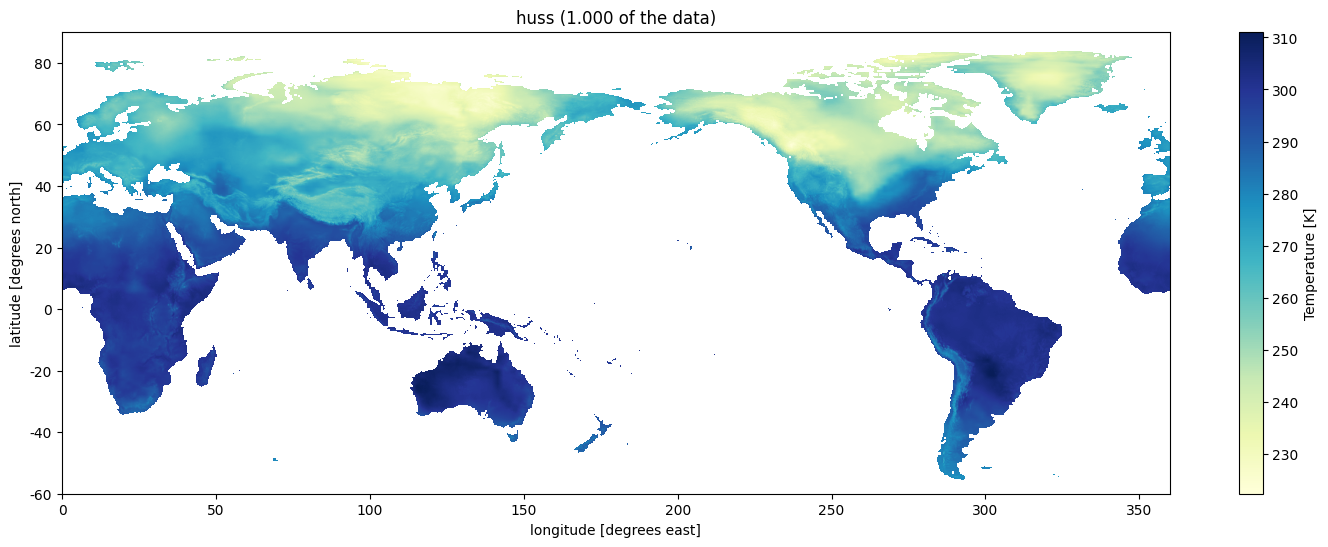

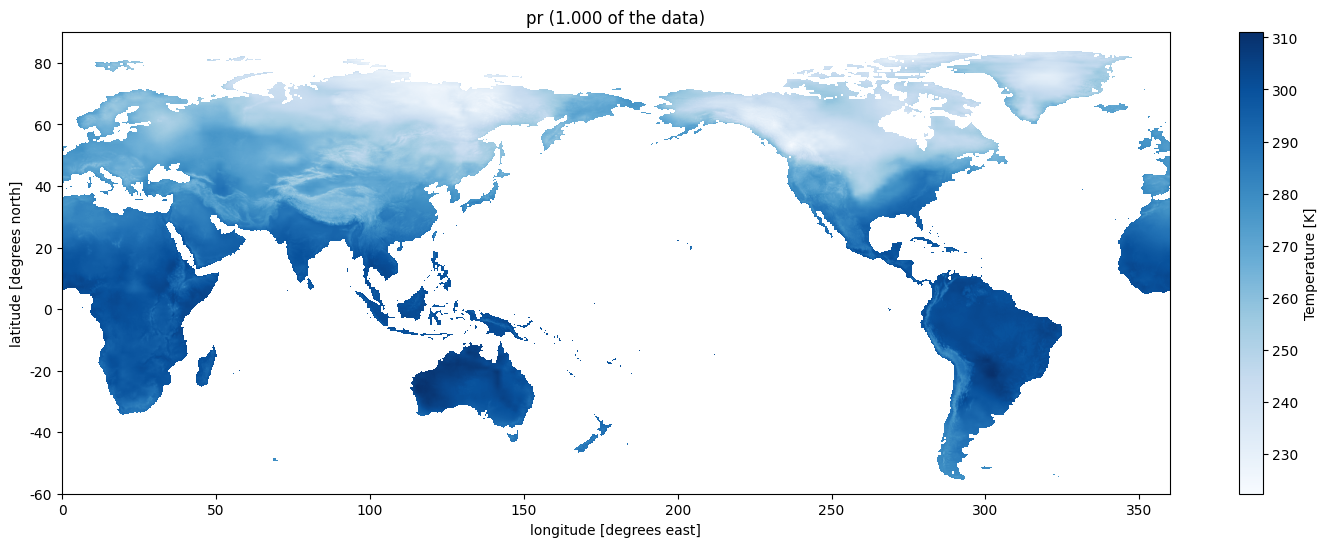

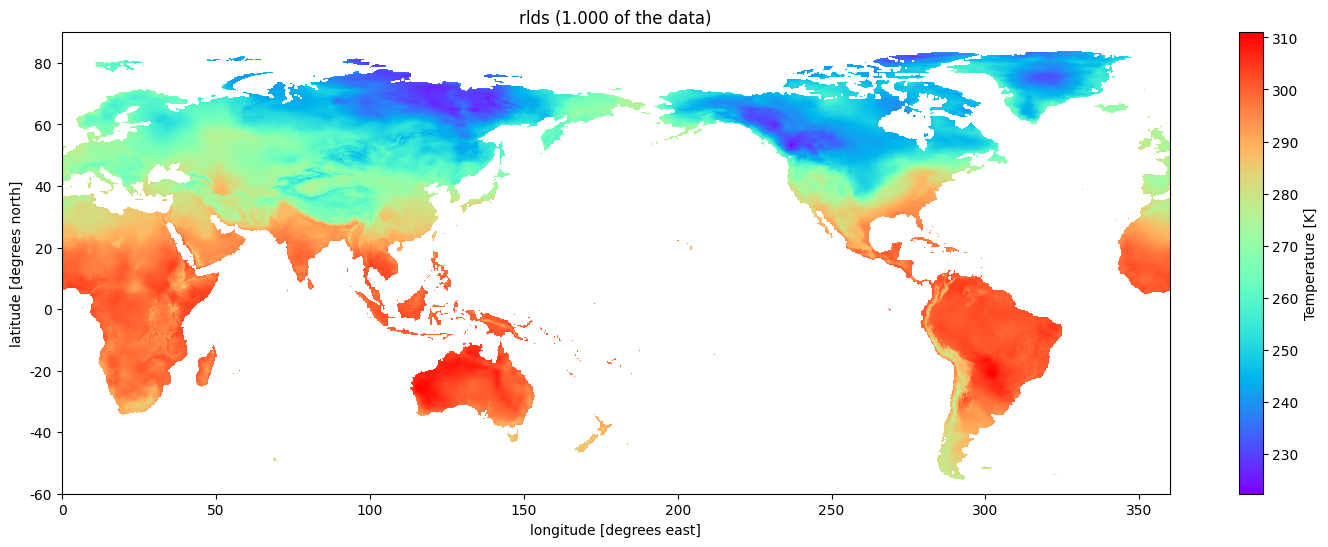

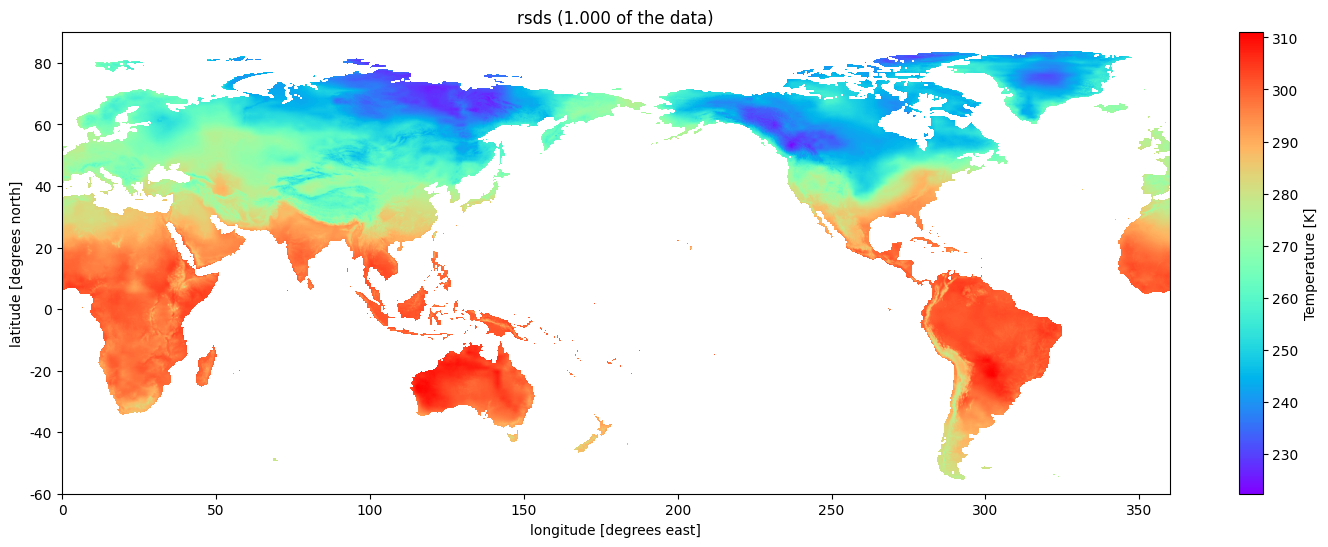

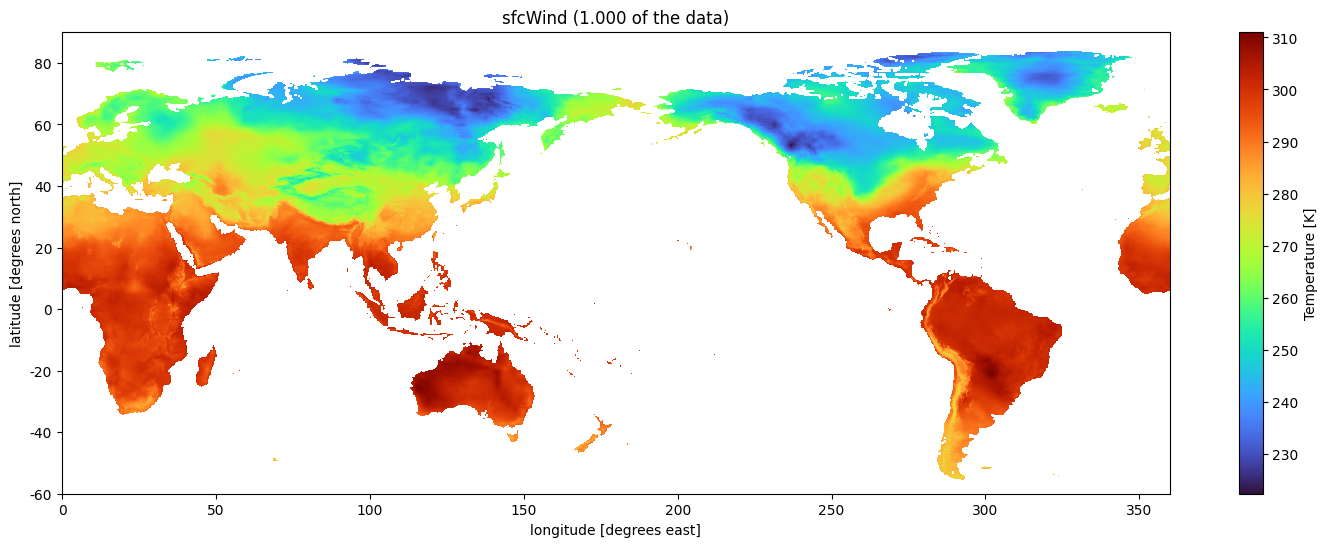

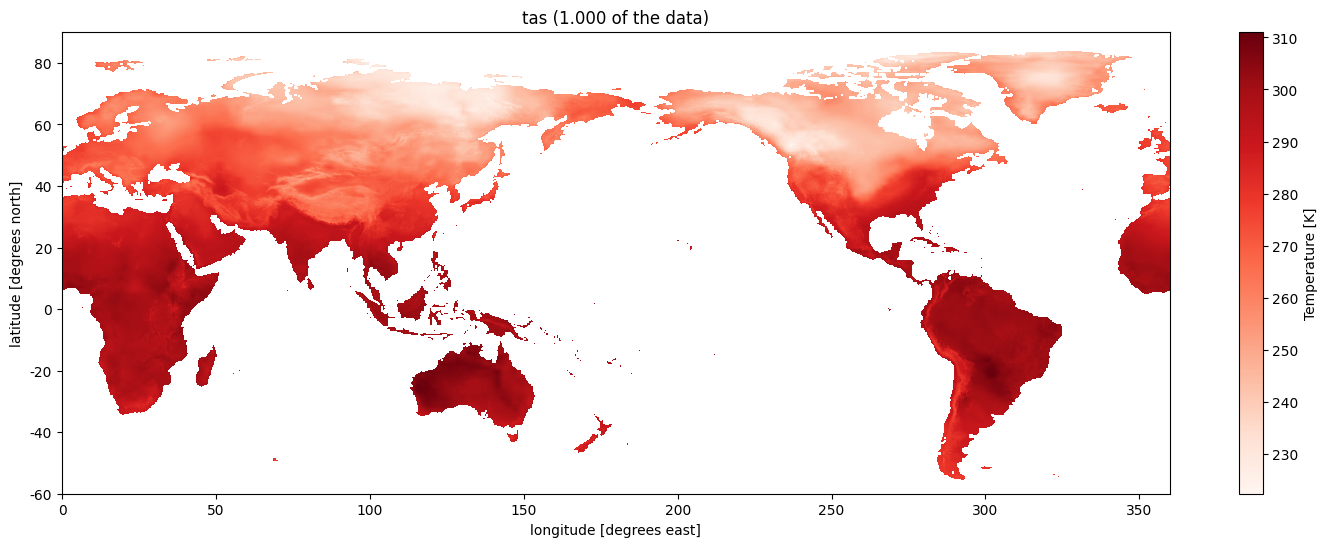

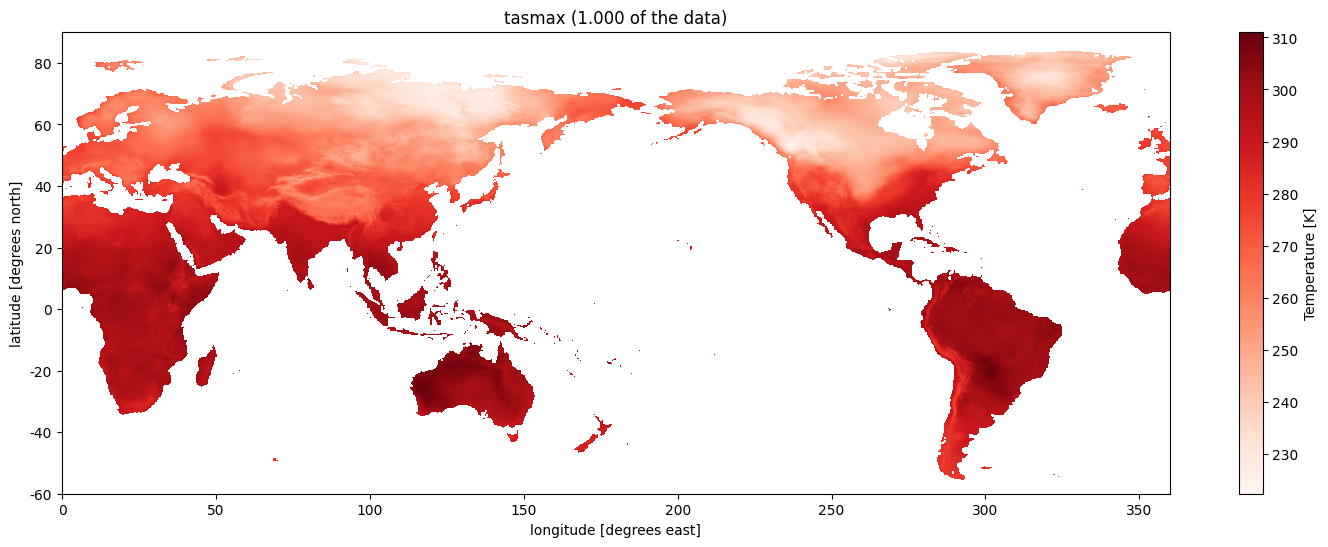

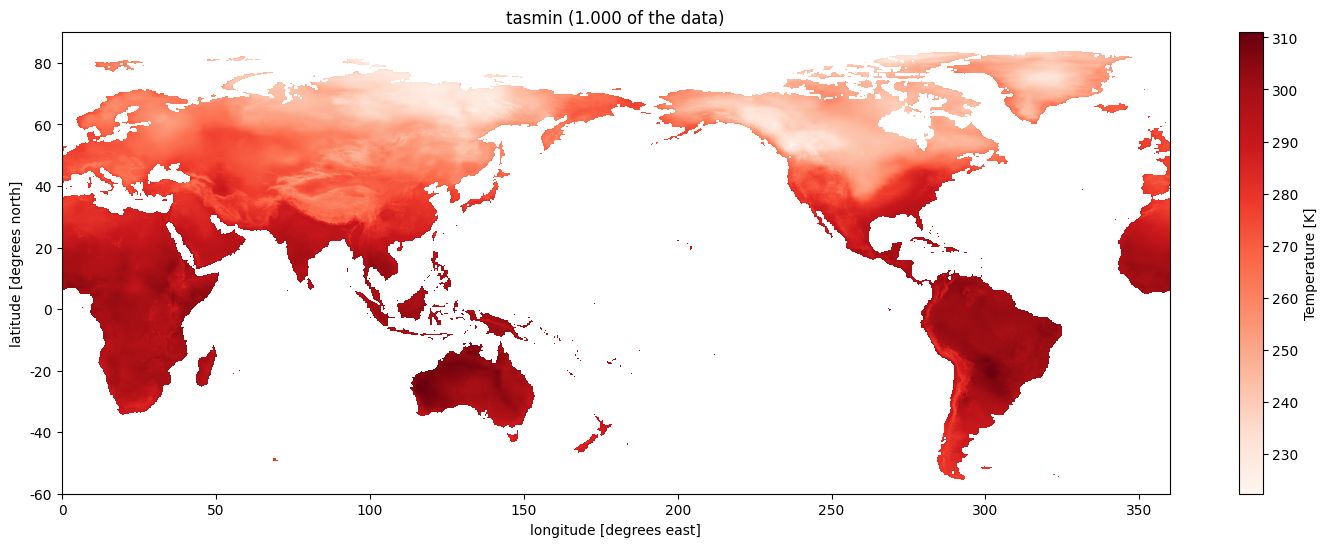

In [4]:
from tqdm.notebook import tqdm

variables = {
    "hurs":    "Near-Surface Relative Humidity",
    "huss":    "Near-Surface Specific Humidity",
    "pr":      "Precipitation",
    "rlds" :   "Surface Downwelling Longwave Radiation",
    "rsds":    "Surface Downwelling Shortwave Radiation",
    "sfcWind": "Daily-Mean Near-Surface Wind Speed",
    "tas":     "Daily Near-Surface Air Temperature",
    "tasmax":  "Daily Maximum Near-Surface Air Temperature",
    "tasmin":  "Daily Minimum Near-Surface Air Temperature"
}


cmpas    = ["YlGnBu","YlGnBu","Blues","rainbow","rainbow","turbo","Reds","Reds","Reds"]


model    = "ACCESS-CM2"
year     = 2015 # This is the year whne the data switches from historical to simulated
scenario = "historical" if year<2015 else "ssp585"
quality  = 0

# Open (connect to) dataset
variable="tas"
dataset_name = f"{variable}_day_{model}_{scenario}_r1i1p1f1_gn"
db = ov.LoadDataset(f"http://atlantis.sci.utah.edu/mod_visus?dataset={dataset_name}&cached=arco")
data=db.read()
y_max,x_max = data.shape 
print(y_max,x_max)

xlabels = [str(x) for x in range(0,360,50)] 
ylabels = [str(x) for x in range(-60,90,20)] 
folder = "./images/"
from pathlib import Path
Path(folder).mkdir(parents=True, exist_ok=True)


for variable, my_cmap in tqdm(zip(variables,cmpas)): 

    my_fig, my_plt = plt.subplots(figsize=(18, 6))
    data=db.read(time=year*365+364,quality=quality)
    y,x = data.shape 
    xticks = [i*x/x_max for i in range(0,x_max, 200)] 
    yticks = [i*y/y_max  for i in range(y_max,0,-80)] 

    plot = my_plt.imshow(np.flip(data, 0), cmap=my_cmap)
    my_plt.set_xticks(xticks, labels=xlabels)
    my_plt.set_yticks(yticks, labels=ylabels)
    my_plt.set(xlabel='longitude [degrees east]', ylabel='latitude [degrees north]',
               title=f"{variable} ({1.0/(2**(-1*quality)):.03f} of the data)")

    # add a colorbar to our figure, based on the plot we just made above
    my_fig.colorbar(plot,location='right', label='Temperature [K]')
    plt.savefig(folder + "NEX-GDDP-CMIP6_ACCESS-CM2_"+variable+"_ssp585_2020_day202.png")
    plt.show()